In [3]:
%config Completer.use_jedi = False

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import sys
sys.path.append('../')
sys.path.append("../../muon_regression/")

from data_processing import hl_features

In [4]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from scipy.stats import gaussian_kde

# Compute v0-v1 and reproduce their graphs

In [1]:
hl_features.muon_features(features=[hl_features.v0, hl_features.v1], 
                          use_files='../use_files.txt',
                          write=True,
                          output_file='../data/v0_v1.csv',
                          threshold=0.1)

In [4]:
v0_v1 = pd.read_csv('../data/v0_v1.csv')

In [13]:
with open(f"../data/v0_density_old.pickle", 'rb') as file:
        z0 = pickle.load(file)
with open(f"../data/v1_density_old.pickle", 'rb') as file:
        z1 = pickle.load(file)

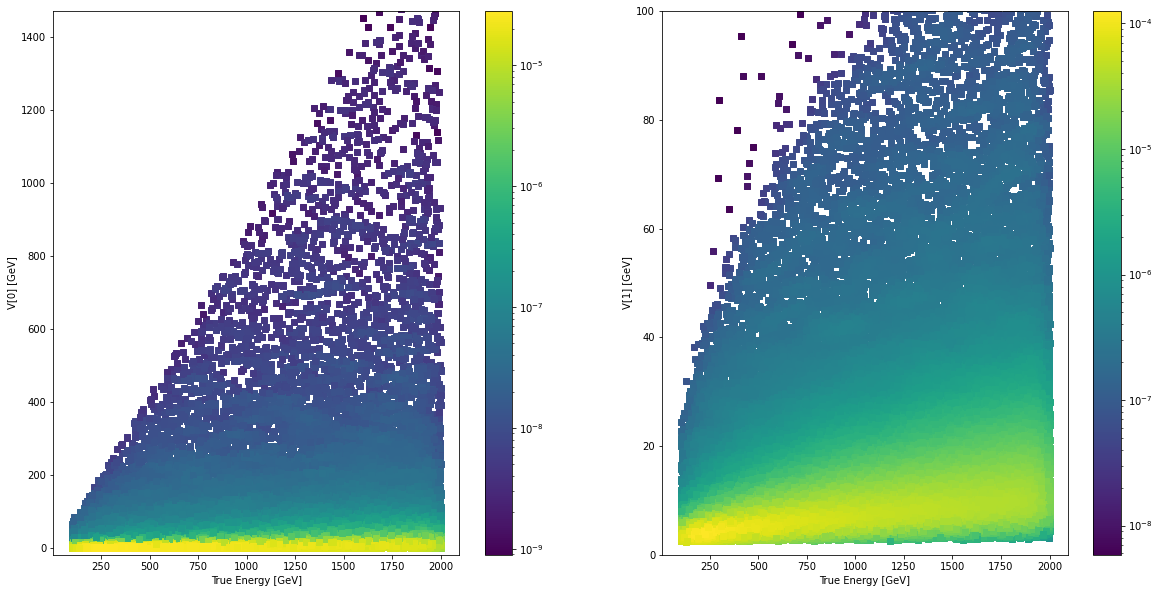

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

v0_plot = ax[0].scatter(x=v0_v1.true_energy, y=v0_v1.loc[:, 'v0'], c=z0, norm=matplotlib.colors.LogNorm(), marker='s')
ax[0].set(xlabel='True Energy [GeV]', ylabel = f'V[0] [GeV]', ylim=(-20, 1470))
fig.colorbar(v0_plot, ax=ax[0])

v1_plot = ax[1].scatter(x=v0_v1.true_energy, y=v0_v1.loc[:, 'v1'], c=z1, norm=matplotlib.colors.LogNorm(), marker='s')
ax[1].set(xlabel='True Energy [GeV]', ylabel = f'V[1] [GeV]', ylim=(0, 100))
fig.colorbar(v1_plot, ax=ax[1])

# Data from ROOT macro

### Check for differences with v0v1 above

In [8]:
data = pd.read_csv('../data/MuEloss_correct.csv', sep=' ')
data.tail()

,v[0],v[1],v[2],v[3],v[4],v[5],v[6],v[7],v[8],v[9],v[10],v[11],v[12],v[13],v[14],v[15],true_energy,correct_true_energy
395995,47.43600,0.0,0.573455,0.573455,175.5570,132.9090,185.6510,184.41300,100.8120,225.8470,1.0,289.0,1.636290,662.0,902.0,2.233330,1002.870,1002.8683
395996,7.23727,0.0,0.905068,0.905068,121.6890,62.0843,75.9965,258.74200,98.0651,137.1370,1.0,839.0,6.739440,10.0,400.0,0.017752,920.702,920.7016
395997,9.98190,0.0,0.877561,0.877561,186.7020,34.9204,194.0400,9.71442,224.1320,68.8687,1.0,40.0,0.067988,57.0,368.0,0.676978,696.027,696.0274
395998,4.50558,0.0,0.865484,0.865484,95.1507,65.5824,43.3061,134.84000,133.0310,45.1880,1.0,529.0,4.209100,12.0,268.0,0.016958,266.856,266.8557
395999,13.01950,0.0,0.389980,0.389980,158.0580,46.6295,244.2340,153.52400,135.3270,141.2360,1.0,76.0,0.253895,148.0,506.0,1.505020,1633.750,1633.7523


They are not ordered the same way, this could influence plots since matplotlib puts later points on top --> UPDATE: just shuffle datapoints and plots will be ok. 

In [8]:
v0_v1.tail()

,true_energy,v0,v1
395995,456.569128,0.255201,3.602214
395996,952.326186,0.729934,4.369923
395997,534.429857,9.217948,9.467583
395998,485.516879,0.000000,3.341851
395999,1661.472331,80.583422,33.852312


### There are some examples for which same true_energy does not correspond to same values of v0/v1

v0_v1 is the one I computed directly from root files transformed to hdf5. data instead is the one coming from c++ macro

<b> It seems that the c++ macro is computing v0 and v1 in a different way for some points. They have a lot of zeros in v1

---- example 1 ----

In [18]:
v0_v1.loc[abs(v0_v1.true_energy - 278.569463) < 0.00001, :]

,true_energy,v0,v1
197999,278.569463,30.635439,19.150993


In [19]:
data.loc[data['correct_true_energy'] == 278.56946, :]

,v[0],v[1],v[2],v[3],v[4],v[5],v[6],v[7],v[8],v[9],v[10],v[11],v[12],v[13],v[14],v[15],true_energy,correct_true_energy
143999,49.7864,0.0,0.505611,0.505611,185.549,135.357,202.484,32.9117,127.753,192.558,1.0,253.0,0.872192,736.0,626.0,5.04015,278.569,278.56946


---- example 2 ----

In [20]:
v0_v1.loc[abs(v0_v1.true_energy - 325.086060) < 0.001, :]

,true_energy,v0,v1
255599,325.086072,28.501786,16.761336


In [21]:
28.501786+16.761336

45.263121999999996

In [22]:
data.loc[data['correct_true_energy'] == 325.086060, :]

,v[0],v[1],v[2],v[3],v[4],v[5],v[6],v[7],v[8],v[9],v[10],v[11],v[12],v[13],v[14],v[15],true_energy,correct_true_energy
197999,45.2631,0.0,0.717206,0.717206,182.896,64.22,200.775,187.476,106.223,174.343,1.0,198.0,0.605018,554.0,552.0,3.16322,325.086,325.08606


---- HOW MANY? ----

In [25]:
v0_v1.sort_values(by="true_energy")

,true_energy,v0,v1
136323,100.002662,1.140409,5.567357
352100,100.007058,0.000000,2.802887
128007,100.009315,0.134055,3.090026
71272,100.010376,0.250414,3.391959
221847,100.011445,0.255659,4.378062
...,...,...,...
54924,1999.977759,1.974045,6.136049
76917,1999.981198,8.005069,11.879238
140346,1999.981529,30.095099,24.096981
291822,1999.983646,23.893570,18.652776


In [30]:
merged = pd.merge_asof(left=v0_v1.sort_values(by="true_energy")\
                                 .rename(columns={"true_energy": "correct_true_energy", 
                                                  "v0": "v0_mine", "v1": "v1_mine"}),
                       
                       right=data.loc[:, ["v[0]", "v[1]", "correct_true_energy"]]\
                                 .sort_values(by="correct_true_energy")\
                                 .rename(columns={"v[0]": "v0_c++", "v[1]": "v1_c++"}),
                       
                       on="correct_true_energy"
                      )

how many zeros in v0

In [70]:
merged.loc[merged.loc[:, "v0_c++"] == 0, :].shape, merged.loc[merged.loc[:, "v0_mine"] == 0, :].shape

((706, 5), (6789, 5))

how many zero in v0 in common

In [72]:
merged.loc[(merged.loc[:, "v0_c++"] == 0) & (merged.loc[:, "v0_mine"] == 0), :].shape

(403, 5)

how many zeros in v1

In [43]:
merged.loc[merged.loc[:, "v1_c++"] == 0, :].shape, merged.loc[merged.loc[:, "v1_mine"] == 0, :].shape

((354758, 5), (0, 5))

how many equal to each other in v0 (if any)

In [51]:
merged.loc[np.abs(merged.loc[:, "v0_mine"] - merged.loc[:, "v0_c++"]) < 0.001, :].shape

(20372, 5)

how many equal to each other in v1 (if any)

In [83]:
merged.loc[np.abs(merged.loc[:, "v1_mine"] - merged.loc[:, "v1_c++"]) < 0.001, :].shape

(20344, 5)

In [5]:
merged = pd.read_csv('../data/v0v1_issues.csv')
merged.head()

,correct_true_energy,v0_mine,v1_mine,v0_c++,v1_c++
0,100.002662,1.140409,5.567357,1.14041,5.56736
1,100.007058,0.000000,2.802887,1.14041,5.56736
2,100.009315,0.134055,3.090026,3.22408,0.00000
3,100.010376,0.250414,3.391959,3.22408,0.00000
4,100.011445,0.255659,4.378062,4.63372,0.00000


#### Plot both densities

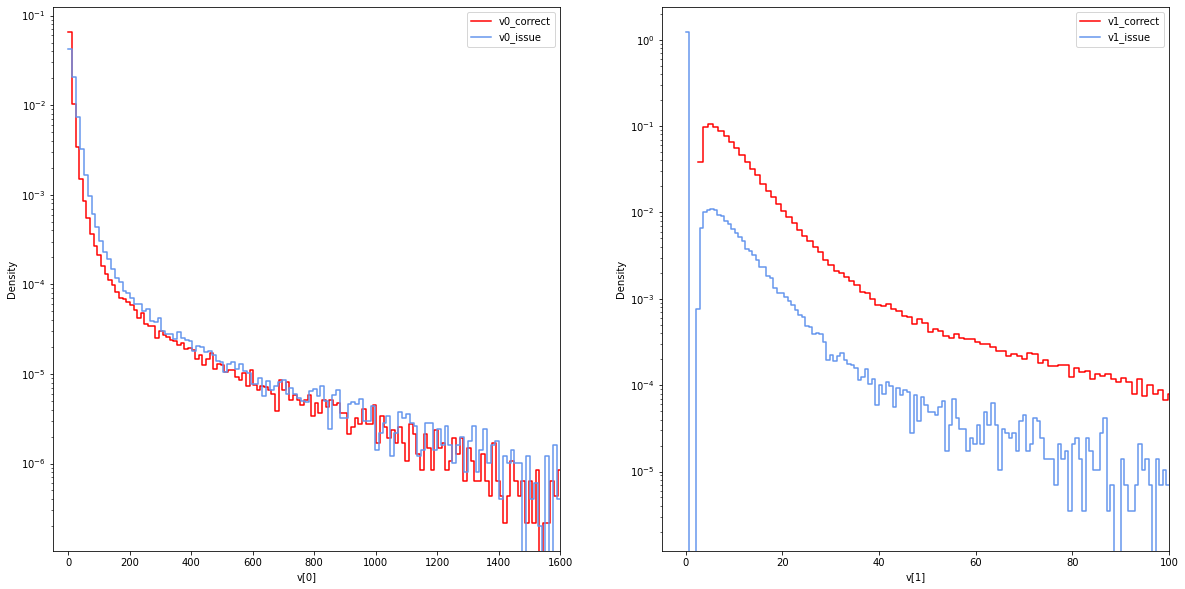

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.histplot(merged.loc[:, 'v0_mine'], bins=150, stat='density', ax=ax[0], element='step', color='red', fill=False, label="v0_correct")
sns.histplot(merged.loc[:, 'v0_c++'], bins=150, stat='density', ax=ax[0], element='step', color='cornflowerblue', fill=False, label="v0_issue")
ax[0].legend()
ax[0].set_xlabel("v[0]")
ax[0].set_yscale('log')
ax[0].set_xlim(left= -50, right=1600)

sns.histplot(merged.loc[:, 'v1_mine'], bins=300, stat='density', ax=ax[1], element='step', color='red', fill=False, label="v1_correct")
sns.histplot(merged.loc[:, 'v1_c++'], bins=300, stat='density', ax=ax[1], element='step', color='cornflowerblue', fill=False, label="v1_issue")
ax[1].legend()
ax[1].set_xlabel("v[1]")
ax[1].set_xlim(left= -5, right=100)
ax[1].set_yscale('log')

# Density plots (see Tommaso's August 2020 paper, figure 3-4, page 7-8)

Minor differences might also be due to the fact that we have 15000 observations less than the full dataset used in the paper

<b> Things to note:
- v[6], v[7], v[8] and v[9] seem to follow a slightly different scale
- v[10] has only 0 or 1 value, hence it makes sense to use a barplot
- v[11] seems to be the most different in terms of density: between 0 and 100 my graph has an upward trend, while theirs is always going down
- v[12] and v[13] seem quite different from theirs in the first part of the density
- v[15] breaks off way before theirs

In [23]:
data.loc[:, ['true_energy', 'v[10]']].groupby('v[10]').count()

,true_energy
v[10],
0.0,1196
1.0,394804


In [24]:
data.loc[:, 'v[11]'].describe()

count    396000.000000
mean        249.121258
std         265.454244
min           0.000000
25%          58.000000
50%         147.000000
75%         310.000000
max        1002.000000
Name: v[11], dtype: float64

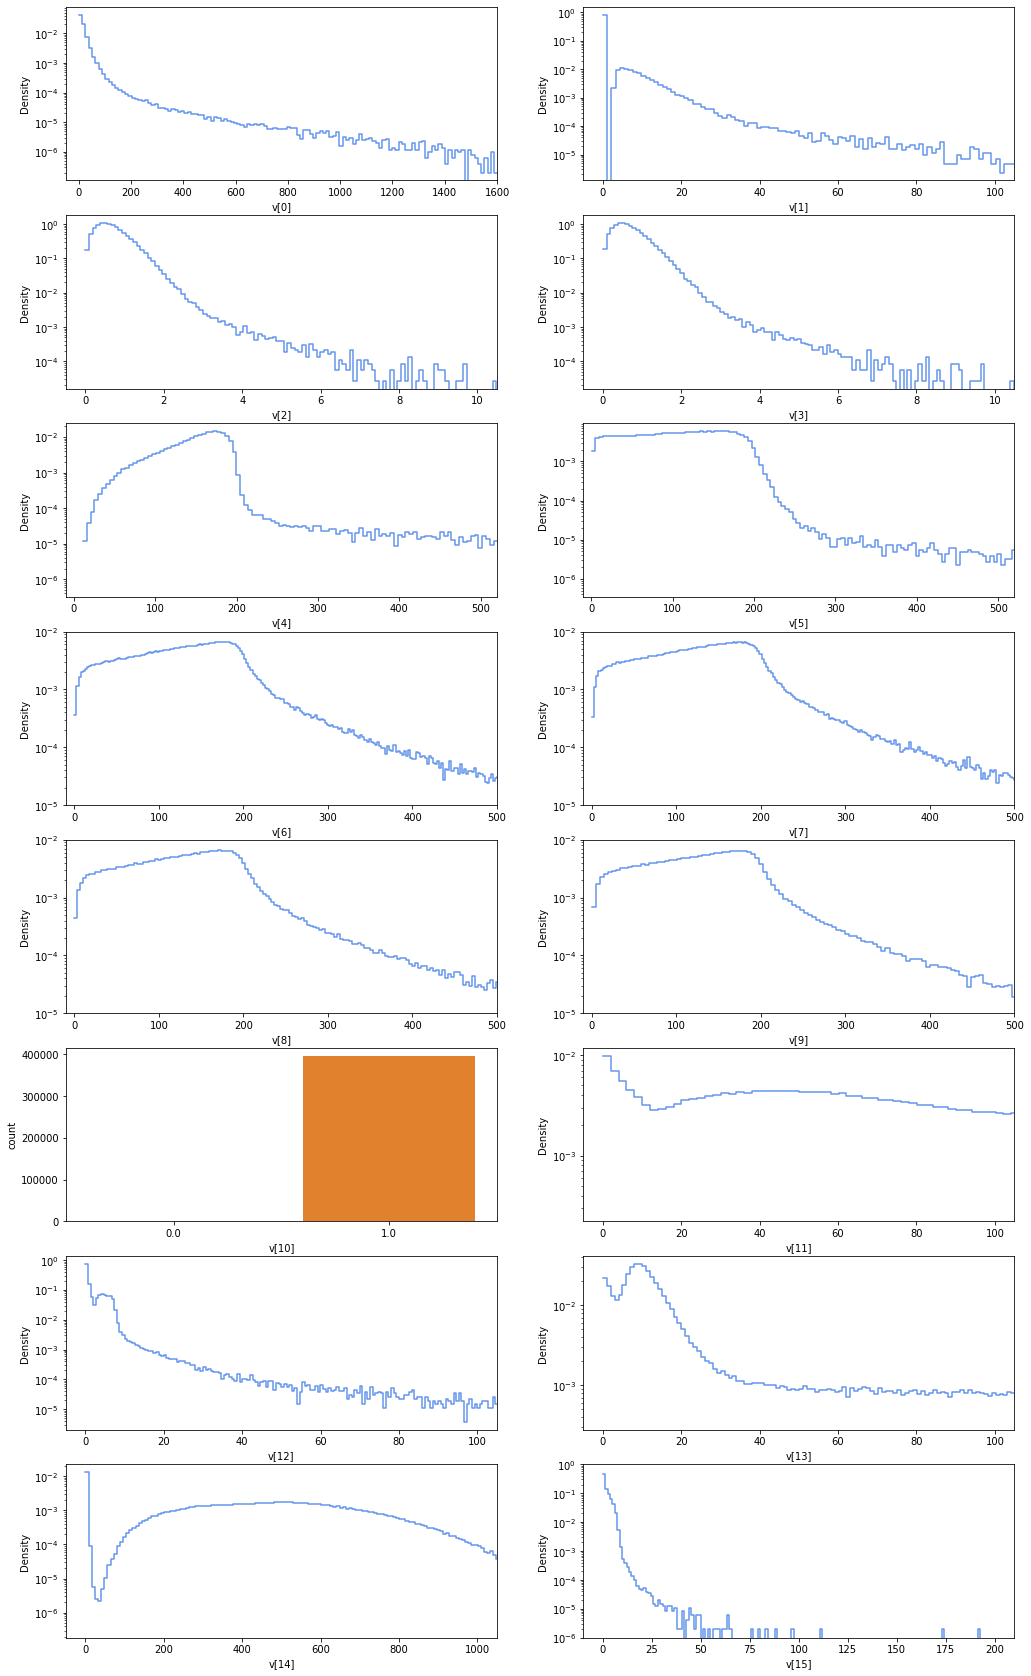

In [14]:
fig, ax = plt.subplots(nrows=8, ncols=2, figsize=(17,30))
i = 0
for row in range(8):
    for col in range(2):
        if i == 10:
            sns.countplot(x=data.loc[:, f'v[{i}]'], ax=ax[row][col])
            i += 1
        else:
            bins = 200
            if i == 0:
                ax[row][col].set_xlim(left= -50, right=1600)
                bins = 150
            elif i == 1:
                ax[row][col].set_xlim(left= -5, right=105)
            elif i == 2:
                ax[row][col].set_xlim(left=-0.5, right=10.5)
            elif i == 3:
                ax[row][col].set_xlim(left=-0.5, right=10.5)
            elif (i == 4):
                ax[row][col].set_xlim(left= -10, right=520)
                bins = 300
            elif (i == 5):
                ax[row][col].set_xlim(left= -10, right=520)
                bins = 400
            elif (i == 6) or (i == 7) or (i == 8) or (i == 9):
                ax[row][col].set_xlim(left= -10, right=500)
                ax[row][col].set_ylim(bottom= 1e-5, top=1e-2)
                bins = 1600
            elif (i == 11):
                ax[row][col].set_xlim(left=-5, right=105)
                bins = 500
            elif (i == 12):
                ax[row][col].set_xlim(left=-5, right=105)
                bins = 2500
            elif i == 13:
                ax[row][col].set_xlim(left=-5, right=105)
                bins = 1000
            elif i == 14:
                ax[row][col].set_xlim(left=-50, right=1050)
            elif i == 15:
                ax[row][col].set_ylim(bottom=1e-6, top=1e0)
                ax[row][col].set_xlim(left=-10, right=210)
                bins = 400
            else:
                ax[row][col].set_xlim(left= -10, right=520)
            ax[row][col].set_yscale('log')
            ax[row][col].set_yscale('log')
            n_unique_obs = len(data.loc[:, f'v[{i}]'].unique())
            #sns.distplot(data.loc[:, f'v[{i}]'], ax=ax[row][col], kde=False, bins=bins, 
            #             hist_kws={"histtype": "step"}, color='blue', norm_hist=True)
            sns.histplot(data.loc[:, f'v[{i}]'], ax=ax[row][col], bins=bins, stat='density', element='step', color='cornflowerblue', fill=False)
            i += 1

# Scatterplots (see Tommaso's August 2020 paper, figure 5-6, page 9-10)

##### Estimate point density to build color gradient

In [28]:
xy_v0 = np.vstack([data.correct_true_energy, data.loc[:, 'v[0]']])
z0 = gaussian_kde(xy_v0)(xy_v0)

xy_v1 = np.vstack([data.correct_true_energy, data.loc[:, 'v[1]']])
z1 = gaussian_kde(xy_v1)(xy_v1)

In [30]:
with open('./../data/v1_density.pickle', 'wb') as file:
    pickle.dump(z1, file)

##### Plot single graph

In [27]:
with open(f"../data/v2_density.pickle", 'rb') as file:
        z2 = pickle.load(file)

In [34]:
idx_shuffled = np.random.permutation(range(396000))
z2_shuffled = z2[idx_shuffled]

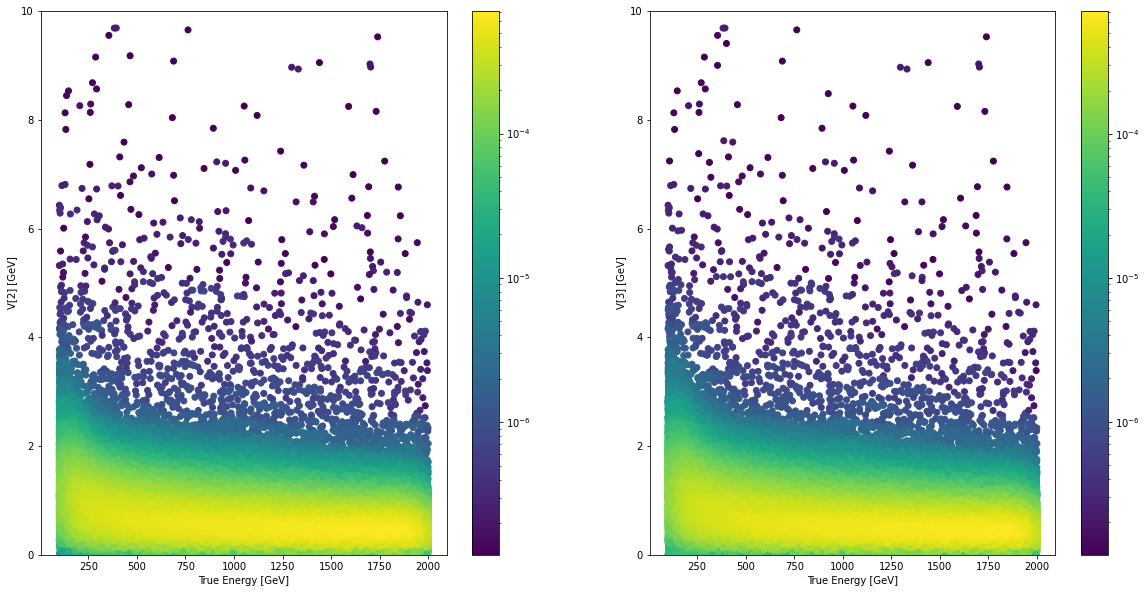

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

v2_plot = ax.scatter(x=data.correct_true_energy[idx_shuffled], y=data.loc[idx_shuffled, 'v[2]'], c=z2_shuffled, norm=matplotlib.colors.LogNorm())
ax.set(xlabel='True Energy [GeV]', ylabel = f'V[2] [GeV]', ylim=(0, 10))
fig.colorbar(v2_plot, ax=ax)

## Plots

In [48]:
n_features = 10
densities = dict()
for i in range(n_features):    
    with open(f"../data/v{i}_density.pickle", 'rb') as file:
        densities[f'v{i}'] = pickle.load(file)

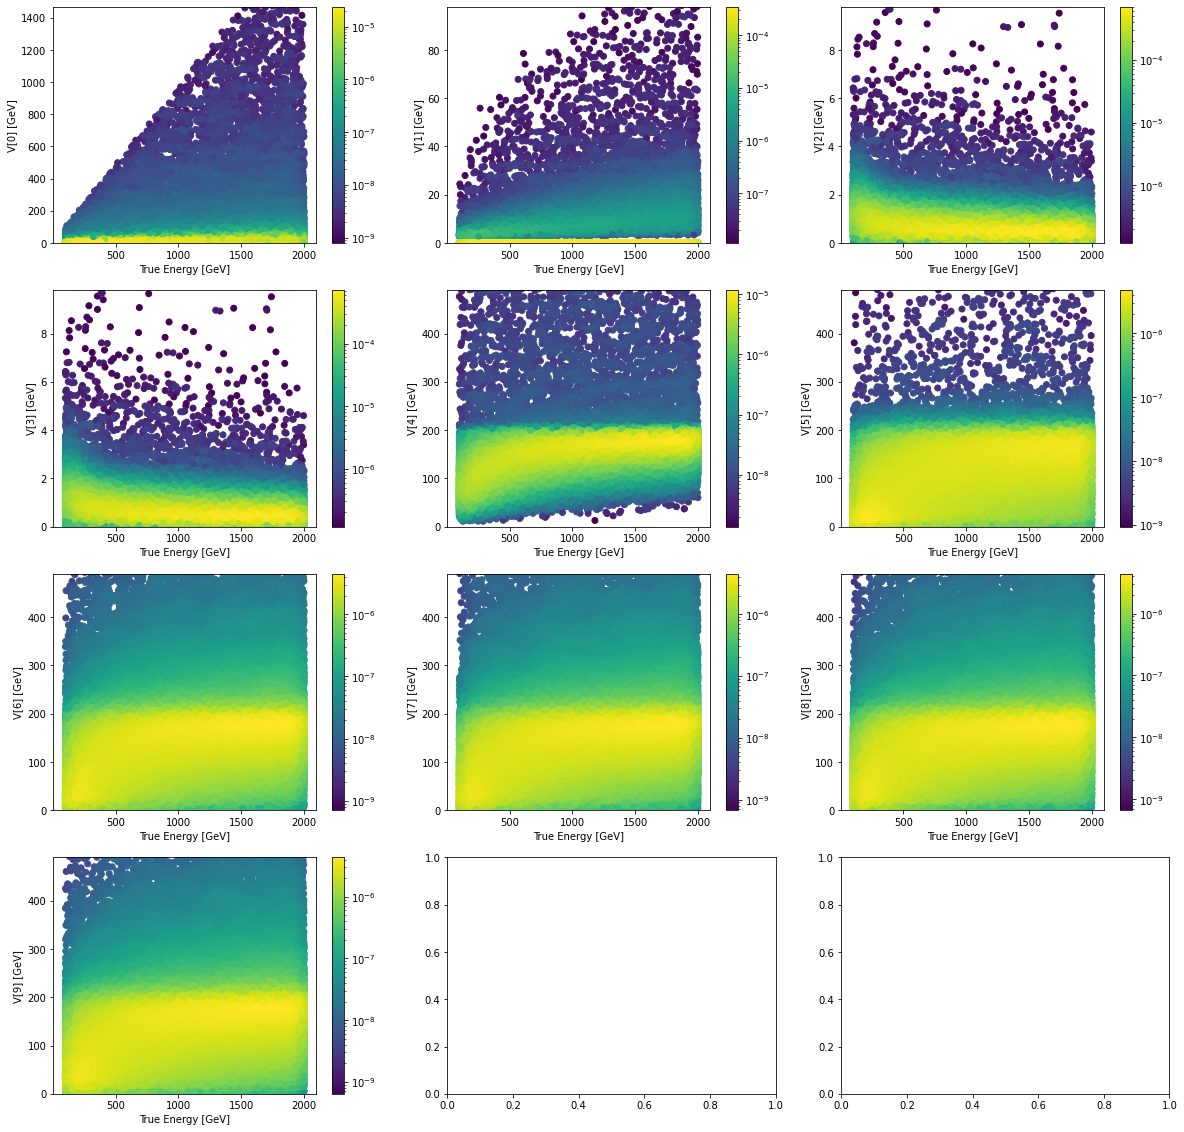

In [55]:
nrows = 4
ncols = 3
idx_shuffled = np.random.permutation(range(396000))
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,20))
i = 0
for row in range(nrows):
    for col in range(ncols):
        if i == n_features:
            plt.show()
            break
        if i == 0:
            ylim_top = 1470
        elif i == 1:
            ylim_top = 98
        elif (i == 2) or (i == 3):
            ylim_top = 9.8
        else:
            ylim_top = 490
        vi_plot = ax[row][col].scatter(x=data.true_energy[idx_shuffled], 
                                       y=data.loc[idx_shuffled, f'v[{i}]'], 
                                       c=densities[f'v{i}'][idx_shuffled], 
                                       norm=matplotlib.colors.LogNorm())
        ax[row][col].set(xlabel='True Energy [GeV]', ylabel = f'V[{i}] [GeV]', ylim=(0, ylim_top))
        fig.colorbar(vi_plot, ax=ax[row][col])
        i += 1

### Alternative ways to plot 2d histogram

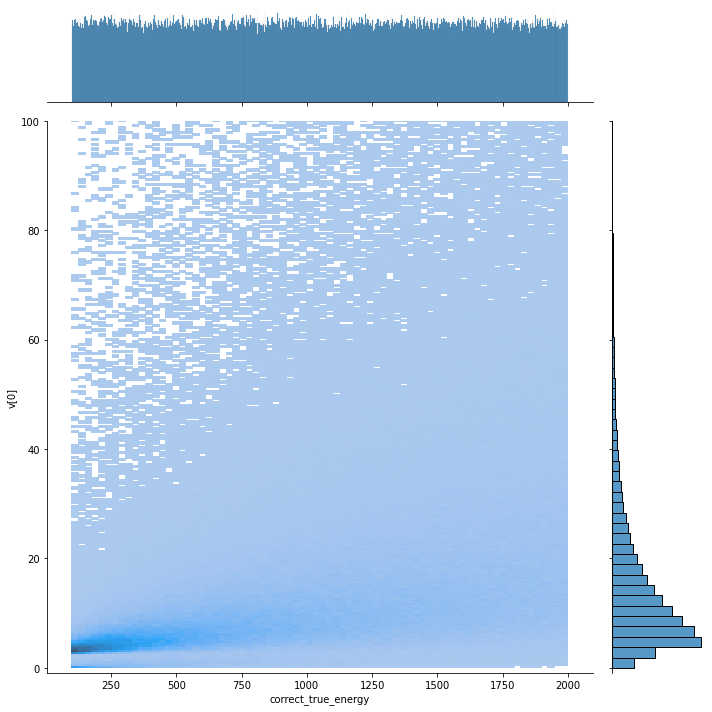

In [30]:
sns.jointplot(x=data.correct_true_energy, y=data.loc[:, 'v[0]'], ylim=(-1, 100), kind='hist', height=10, marginal_kws=dict(bins=1000))

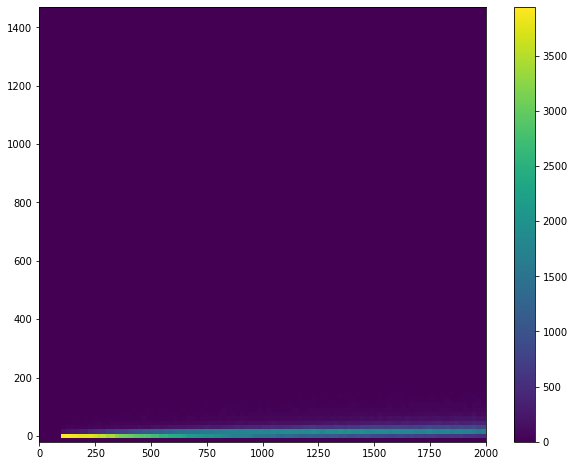

In [41]:
plt.figure(figsize=(10,8))
plot = plt.hist2d(x=data.correct_true_energy, y=data.loc[:, 'v[0]'], bins=100, alpha=1.5, range=[[0, 2000], [-20, 1470]])
plt.colorbar()
plt.show()